In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

2.2.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
crypto = pd.read_csv('CryptocoinsHistoricalPrices.csv',index_col=0)
crypto.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [4]:
#Deleting the NA values at the end

crypto.dropna(axis=0, inplace = True)

In [5]:
#extracting month
month = crypto['Date'].values
month = [my_str.split("-")[1] for my_str in month]
crypto["Month"] = month

In [8]:
#extracting year
year = crypto['Date'].values
year = [my_str.split("-")[0] for my_str in year]
crypto["Year"] = year

In [9]:
crypto.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Month,Year
1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512,01,2018
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875,01,2018
3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604,01,2018
4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242,01,2018
5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591,12,2017


In [10]:
crypto.tail()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Month,Year
651360,2017-11-24,0.001507,0.002919,0.000623,0.002350,"1,532",-,IPY,0.559390,11,2017
651361,2017-11-23,0.001035,0.002162,0.001035,0.001514,"2,622",-,IPY,0.462802,11,2017
651362,2017-11-22,0.001781,0.001781,0.000339,0.001032,"2,706",-,IPY,-0.420550,11,2017
651363,2017-11-21,0.038891,0.039477,0.017002,0.017092,"58,003",-,IPY,-0.560515,11,2017
651364,2017-11-20,0.049463,0.058766,0.038952,0.038952,"95,040",-,IPY,-0.212502,11,2017


In [22]:
cleaned_crypto = crypto[(crypto['Market.Cap']!='-') & (crypto['Volume']!='-')]

In [34]:
cleaned_crypto.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Month,Year
1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000",256250000000,BTC,0.021512,01,2018
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000",251312000000,BTC,0.014875,01,2018
3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000",228579000000,BTC,0.099604,01,2018
4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000",236725000000,BTC,-0.032242,01,2018
5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000",216326000000,BTC,0.097591,12,2017


In [33]:
#Removing Commas from Market.Cap
cleaned_crypto['Market.Cap'] = cleaned_crypto['Market.Cap'].str.replace(',','')

C:\Users\adi19\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
#Removing Commas from Volume
cleaned_crypto['Volume'] = cleaned_crypto['Volume'].str.replace(',','')

C:\Users\adi19\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
cleaned_crypto.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Month,Year
1,2018-01-04,15270.7,15739.7,14522.2,15599.2,21783200000,256250000000,BTC,0.021512,01,2018
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900000,251312000000,BTC,0.014875,01,2018
3,2018-01-02,13625.0,15444.6,13163.6,14982.1,16846600000,228579000000,BTC,0.099604,01,2018
4,2018-01-01,14112.2,14112.2,13154.7,13657.2,10291200000,236725000000,BTC,-0.032242,01,2018
5,2017-12-31,12897.7,14377.4,12755.6,14156.4,12136300000,216326000000,BTC,0.097591,12,2017


In [38]:
#Volume and Market Cap are in Str, we need to change it to float
cleaned_crypto['Market.Cap'] = cleaned_crypto['Market.Cap'].astype('float')
cleaned_crypto['Volume'] = cleaned_crypto['Volume'].astype('float')

C:\Users\adi19\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\adi19\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [41]:
# Checking the type again
type(cleaned_crypto['Volume'][1])

numpy.float64

In [42]:
# Checking number of records of each coin
cleaned_crypto['coin'].value_counts()

NET      1638
FTC      1470
BTC      1470
XRP      1470
GLD      1470
TAG      1470
DEM      1470
FLO      1470
NVC      1470
MEC      1470
DOGE     1470
XPM      1470
UNO      1470
NMC      1470
PPC      1470
WDC      1470
LTC      1470
QRK      1469
EAC      1469
ZET      1469
DGC      1469
NXT      1469
DMD      1468
CBX      1467
TIPS     1465
ANC      1465
SXC      1464
OMNI     1464
YAC      1458
LOT      1456
         ... 
AIB         9
ELF         8
ORME        8
BRD         8
BNTY        8
CTIC3       8
HWC         8
SEND        8
TRDT        8
DAT         7
FLASH       7
SNOV        7
WAX         7
DTR         7
ERO         7
FOR         7
WILD        7
MONEY       6
PKT         6
DAI         5
OCOW        4
MED         4
UTK         4
DBC         2
GTO         2
NEU         2
STAK        2
SRN         2
WRC         1
MAGE        1
Name: coin, Length: 1117, dtype: int64

In [66]:
# We are taking data of only 2017 as cryptocurrency was hyped in that year
# Chunking the data according to the year 2017

cleaned_crypto2017 = cleaned_crypto[cleaned_crypto['Year']=='2017']
cleaned_crypto2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253759 entries, 5 to 649862
Data columns (total 11 columns):
Date          253759 non-null object
Open          253759 non-null float64
High          253759 non-null float64
Low           253759 non-null float64
Close         253759 non-null float64
Volume        253759 non-null float64
Market.Cap    253759 non-null float64
coin          253759 non-null object
Delta         253759 non-null float64
Month         253759 non-null object
Year          253759 non-null object
dtypes: float64(7), object(4)
memory usage: 23.2+ MB


In [47]:
#Checking the record of each coin in 2017
cleaned_crypto2017['coin'].value_counts()

GCC      650
ARC      628
NET      534
ICN      526
BTM      510
CMT      370
EGC      365
PAK      365
BTS      365
TAJ      365
MAID     365
NYAN     365
DGD      365
CURE     365
GEO      365
AUR      365
XHI      365
VRM      365
TROLL    365
ZEIT     365
SEQ      365
TRUST    365
POT      365
EL       365
DUO      365
FCT      365
UIS      365
2GIVE    365
USDT     365
GP       365
        ... 
ST        11
MOTO       9
STARS      9
ICX        7
STU        6
CRED       6
STORM      6
REC        6
ITC        5
DFS        5
AIB        5
CTIC3      4
BNTY       4
SEND       4
ORME       4
BRD        4
ELF        4
HWC        4
TRDT       4
SNOV       3
FLASH      3
DAT        3
FOR        3
WAX        3
ERO        3
WILD       3
DTR        3
PKT        2
DAI        1
MAGE       1
Name: coin, Length: 1081, dtype: int64

In [57]:
# Checking top Crypto Currency in the year 2017
#cleaned_crypto2017.groupby('coin').sort_values(by='Market.Cap',ascending=True)
#cleaned_crypto2017.sort_values(by='Market.Cap', ascending=True).groupby('coin').head(1000)#
cleaned_crypto2017.groupby('coin').count().sort_values(by='Market.Cap', ascending=False).head(1000)


,Date,Open,High,Low,Close,Volume,Market.Cap,Delta,Month,Year
coin,,,,,,,,,,
GCC,650,650,650,650,650,650,650,650,650,650
ARC,628,628,628,628,628,628,628,628,628,628
NET,534,534,534,534,534,534,534,534,534,534
ICN,526,526,526,526,526,526,526,526,526,526
BTM,510,510,510,510,510,510,510,510,510,510
CMT,370,370,370,370,370,370,370,370,370,370
VLT,365,365,365,365,365,365,365,365,365,365
DBTC,365,365,365,365,365,365,365,365,365,365
LKK,365,365,365,365,365,365,365,365,365,365


In [75]:
#Sorting values by Market Cap
# We took 10% of the top market values to see the boosted currencies
top25000 = cleaned_crypto2017.sort_values('Market.Cap', ascending = False).head(25000)
top25000.groupby('coin').count().sort_values('Market.Cap', ascending=False).head(10)

,Date,Open,High,Low,Close,Volume,Market.Cap,Delta,Month,Year
coin,,,,,,,,,,
LTC,365,365,365,365,365,365,365,365,365,365
XRP,365,365,365,365,365,365,365,365,365,365
BTC,365,365,365,365,365,365,365,365,365,365
DASH,365,365,365,365,365,365,365,365,365,365
ETH,365,365,365,365,365,365,365,365,365,365
ETC,365,365,365,365,365,365,365,365,365,365
REP,365,365,365,365,365,365,365,365,365,365
XMR,365,365,365,365,365,365,365,365,365,365
MAID,365,365,365,365,365,365,365,365,365,365


In [76]:
# Checking top currency
top10 = top25000.groupby('coin').count().sort_values('Market.Cap', ascending=False).head(10)

In [87]:
#Checking Index of top 10 coins
top_coins = top10.index
top_coins

Index(['LTC', 'XRP', 'BTC', 'DASH', 'ETH', 'ETC', 'REP', 'XMR', 'MAID', 'XEM'], dtype='object', name='coin')

In [88]:
cryptoData = top25000[top25000['coin'].isin(top_coins)]

In [93]:
cryptoData.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Month,Year
19,2017-12-17,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11,BTC,-0.017201,12,2017
17,2017-12-19,19118.3,19177.8,17275.4,17776.7,1.689450e+10,3.202420e+11,BTC,-0.070174,12,2017
18,2017-12-18,19106.4,19371.0,18355.9,19114.2,1.483950e+10,3.200000e+11,BTC,0.000408,12,2017
28,2017-12-08,17802.9,18353.4,14336.9,16569.4,2.113600e+10,2.977870e+11,BTC,-0.069286,12,2017
16,2017-12-20,17760.3,17934.7,16077.7,16624.6,2.214970e+10,2.975260e+11,BTC,-0.063946,12,2017


In [101]:
AverageVolume =  pd.DataFrame(cryptoData.groupby('coin').mean()['Volume'])
AverageVolume

# Changing the index to column

AverageVolume = AverageVolume.reset_index


In [102]:
AverageVolume

<bound method DataFrame.reset_index of             Volume
coin              
BTC   2.382867e+09
DASH  6.479198e+07
ETC   1.393995e+08
ETH   7.432752e+08
LTC   3.331996e+08
MAID  2.391461e+06
REP   3.755327e+06
XEM   1.479735e+07
XMR   4.522048e+07
XRP   2.856287e+08>

C:\Users\adi19\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



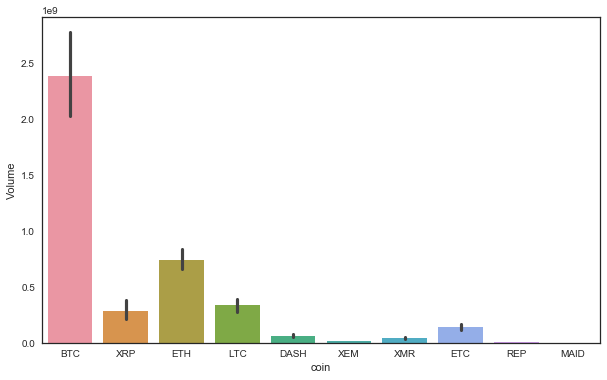

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(x='coin',y='Volume',data=cryptoData,estimator=np.mean)

In [108]:
# This plot shows that people are moving to BTC, XRP(Ripple), ETH(Ethereum), LTC( Lite Coin) and ETC( Ethereum Classic)as well

# I have performed Exploratory Data Analysis on the Opening Value ( OPEN ) for the coins to visualize how much the opening value of the coins varied in the year 2017 

In [116]:
#Creating a Dataset for BTC 
cryptoData_BTC = cryptoData[cryptoData['coin']=='BTC']

In [204]:
import plotly.graph_objs as go
data = [go.Scatter(x=cryptoData_BTC['Month'], y=cryptoData_BTC['Open'], name='Open')]
cryptoData_BTC.iplot(data=data)

In [179]:
cryptoData_BTC_Open = pd.concat([cryptoData_BTC['Open'], cryptoData_BTC['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_BTC_Open = pd.DataFrame(cryptoData_BTC['Open'], cryptoData_BTC['Date'])

In [180]:
cryptoData_BTC_Open.head()

,Open,Date
19,19475.8,2017-12-17
17,19118.3,2017-12-19
18,19106.4,2017-12-18
28,17802.9,2017-12-08
16,17760.3,2017-12-20


In [181]:
cryptoData_BTC_Open.sort_values('Date', ascending=True, inplace=True)

In [185]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

2.2.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [186]:
cryptoData_BTC_Open.head()

,Open,Date
369,963.66,2017-01-01
368,998.62,2017-01-02
367,1021.60,2017-01-03
366,1044.40,2017-01-04
365,1156.73,2017-01-05


In [190]:
data = [go.Scatter(x=cryptoData_BTC_Open['Date'], y=cryptoData_BTC_Open['Open'], name='Open')]
cryptoData_BTC_Open.iplot(data=data)

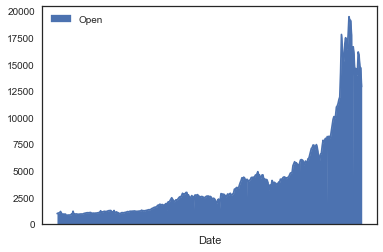

In [197]:
cryptoData_BTC_Open.plot(x='Date', y='Open', kind='Area')

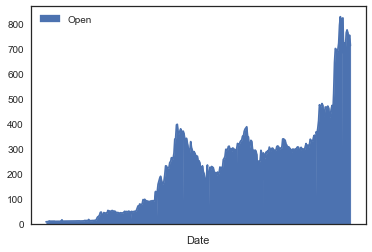

In [205]:
#Creating a Dataset for ETH
cryptoData_ETH = cryptoData[cryptoData['coin']=='ETH']
cryptoData_ETH_Open = pd.concat([cryptoData_ETH['Open'], cryptoData_ETH['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_BTC_Open = pd.DataFrame(cryptoData_BTC['Open'], cryptoData_BTC['Date'])
cryptoData_ETH_Open.sort_values('Date', ascending=True, inplace=True)
cryptoData_ETH_Open.plot(x='Date', y='Open', kind='Area')

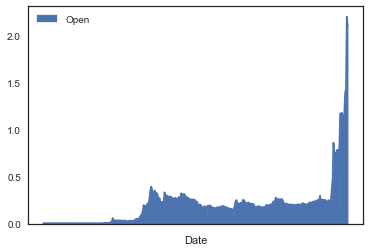

In [206]:
#Creating a Dataset for XRP
cryptoData_XRP = cryptoData[cryptoData['coin']=='XRP']
cryptoData_XRP_Open = pd.concat([cryptoData_XRP['Open'], cryptoData_XRP['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_XRP_Open = pd.DataFrame(cryptoData_XRP['Open'], cryptoData_XRP['Date'])
cryptoData_XRP_Open.sort_values('Date', ascending=True, inplace=True)
cryptoData_XRP_Open.plot(x='Date', y='Open', kind='Area')

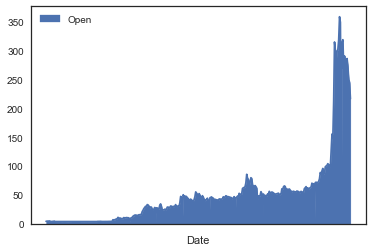

In [207]:
#Creating a Dataset for LTC
cryptoData_LTC = cryptoData[cryptoData['coin']=='LTC']
cryptoData_LTC_Open = pd.concat([cryptoData_LTC['Open'], cryptoData_LTC['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_LTC_Open = pd.DataFrame(cryptoData_LTC['Open'], cryptoData_LTC['Date'])
cryptoData_LTC_Open.sort_values('Date', ascending=True, inplace=True)
cryptoData_LTC_Open.plot(x='Date', y='Open', kind='Area')

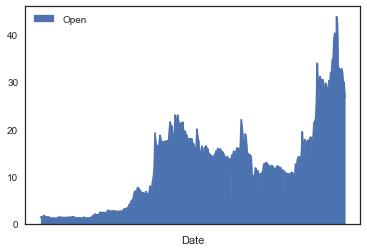

In [208]:
#Creating a Dataset for ETC
cryptoData_ETC = cryptoData[cryptoData['coin']=='ETC']
cryptoData_ETC_Open = pd.concat([cryptoData_ETC['Open'], cryptoData_ETC['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_ETC_Open = pd.DataFrame(cryptoData_ETC['Open'], cryptoData_ETC['Date'])
cryptoData_ETC_Open.sort_values('Date', ascending=True, inplace=True)
cryptoData_ETC_Open.plot(x='Date', y='Open', kind='Area')

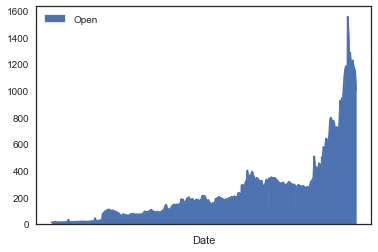

In [214]:
#Creating a Dataset for DASH
cryptoData_DASH = cryptoData[cryptoData['coin']=='DASH']
cryptoData_DASH_Open = pd.concat([cryptoData_DASH['Open'], cryptoData_DASH['Date']], axis=1, keys=['Open', 'Date'])
#cryptoData_DASH_Open = pd.DataFrame(cryptoData_DASH['Open'], cryptoData_DASH['Date'])
cryptoData_DASH_Open.sort_values('Date', ascending=True, inplace=True)
cryptoData_DASH_Open.plot(x='Date', y='Open', kind='Area')

# After completing the analysis of the Opening Value, I have visualized the " Delta" Value of the coins, to understand how much the value fluctuated.

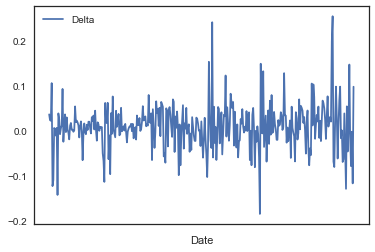

In [215]:
cryptoData_BTC_Delta = pd.concat([cryptoData_BTC['Delta'], cryptoData_BTC['Date']], axis=1, keys=['Delta', 'Date'])
#cryptoData_DASH_Open = pd.DataFrame(cryptoData_DASH['Open'], cryptoData_DASH['Date'])
cryptoData_BTC_Delta.sort_values('Date', ascending=True, inplace=True)
cryptoData_BTC_Delta.plot(x='Date', y='Delta')

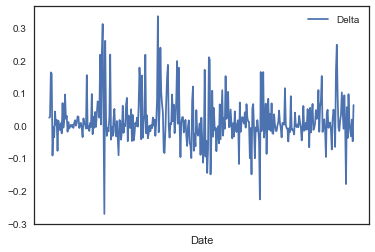

In [216]:
cryptoData_ETH = cryptoData[cryptoData['coin']=='ETH']
cryptoData_ETH_Delta = pd.concat([cryptoData_ETH['Delta'], cryptoData_ETH['Date']], axis=1, keys=['Delta', 'Date'])
cryptoData_ETH_Delta.sort_values('Date', ascending=True, inplace=True)
cryptoData_ETH_Delta.plot(x='Date', y='Delta')

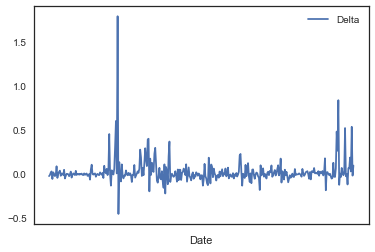

In [217]:
cryptoData_XRP = cryptoData[cryptoData['coin']=='XRP']
cryptoData_XRP_Delta = pd.concat([cryptoData_XRP['Delta'], cryptoData_XRP['Date']], axis=1, keys=['Delta', 'Date'])
cryptoData_XRP_Delta.sort_values('Date', ascending=True, inplace=True)
cryptoData_XRP_Delta.plot(x='Date', y='Delta')

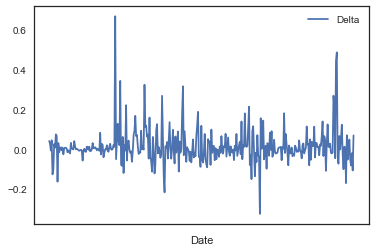

In [218]:
cryptoData_LTC = cryptoData[cryptoData['coin']=='LTC']
cryptoData_LTC_Delta = pd.concat([cryptoData_LTC['Delta'], cryptoData_LTC['Date']], axis=1, keys=['Delta', 'Date'])
cryptoData_LTC_Delta.sort_values('Date', ascending=True, inplace=True)
cryptoData_LTC_Delta.plot(x='Date', y='Delta')

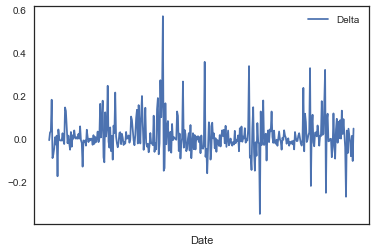

In [219]:
cryptoData_ETC = cryptoData[cryptoData['coin']=='ETC']
cryptoData_ETC_Delta = pd.concat([cryptoData_ETC['Delta'], cryptoData_ETC['Date']], axis=1, keys=['Delta', 'Date'])
cryptoData_ETC_Delta.sort_values('Date', ascending=True, inplace=True)
cryptoData_ETC_Delta.plot(x='Date', y='Delta')

In [220]:
# From the above Visualizations, it is clear that in the last year BTC, XRP, ETH, LTC have burgeoned. The transformation was a 
#sudden one occurend in the second half of the year

In [ ]:
#From the Delta Plotting, It is understood that BTC has fluctuated the most and is not in a stable condition to invest.
#Ripple went high for the one period of time, but has not been fluctuating much after that. Ripple seems to be a promising cryptocurrency to 
#invest in
